In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def extract_data(filename):
    mytraj = np.loadtxt(filename)
    (Kp,Kd,Ki) = mytraj[0,:]
    mytraj = mytraj[10:,:]
    steer_val = -(Kp*mytraj[:,0]+Kd*mytraj[:,1]+Ki*mytraj[:,2])
    steer_val = np.maximum(np.minimum(steer_val,1), -1)
    label = 'Kp = %4.2f, Kd = %4.2f, Ki = %6.5f'%(Kp,Kd,Ki)
    return label,mytraj,steer_val

# Reflection

To start with, let's review the impact of the P, I and D coefficients

#### Note:
One aspect of the project that is different from the video lectures is that the target trajectory is not a straight line. So if the steering value is set to zero, then the CTE changes with time. The car drives off the track as the track curves. In the plots, note that the track edge is roughly at 3.2



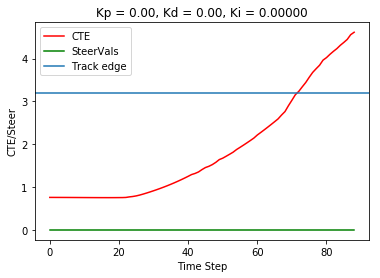

In [52]:
(label,errors,steers) = extract_data('lzeros.txt')
plt.figure()
line1=plt.plot(errors[:,0],'r',label = 'CTE')
line2=plt.plot(steers,'g',label = 'SteerVals')
line3 = plt.axhline(3.2, label = 'Track edge')
plt.legend()
plt.title(label)
plt.xlabel('Time Step')
plt.ylabel('CTE/Steer')

## Impact of the P and D coefficients.
We start by using only the P coefficient (Kp = 1) and compare it with using both the P and D coefficients (Kp=Kd=1). Since the coefficients are not yet optimized, it is run only for the first few time steps, not for the entire lap.
As expected, oscillations are much more severe without the D coefficient. Use of the differential controller significantly dampens the oscillations.
Since these coefficients are not yet optimized, the car does go off the track at later parts of the track.

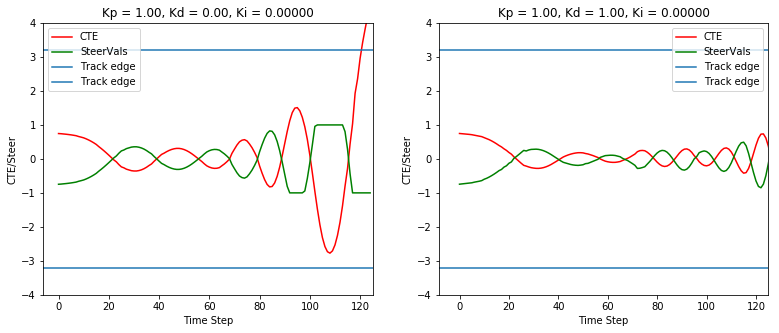

In [53]:
(label1,errors1,steers1) = extract_data('lp1.txt')
(label2,errors2,steers2) = extract_data('lp1d1.txt')
fig_size = (13,5)
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(errors1[:,0],'r',label = 'CTE')
ax1.plot(steers1,'g',label = 'SteerVals')
ax1.axhline(3.2, label = 'Track edge')
ax1.axhline(-3.2, label = 'Track edge')
ax1.set_xlim(xmax=125)
ax1.set_ylim(-4,4)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('CTE/Steer')
ax1.legend()
ax1.set_title(label1)
ax2.plot(errors2[:,0],'r',label = 'CTE')
ax2.plot(steers2,'g',label = 'SteerVals')
ax2.axhline(3.2, label = 'Track edge')
ax2.axhline(-3.2, label = 'Track edge')
ax2.set_xlim(xmax=125)
ax2.set_ylim(-4,4)
plt.xlabel('Time Step')
plt.ylabel('CTE/Steer')
ax2.legend()
ax2.set_title(label2)


## Impact of the I coefficient

Since the "scale" of the integral error was significantly different than the others, I was not able to play around with the I coefficient until the parameters were somewhat optimized. After optimization, I looked at the impact of the I coefficient. Left plot shows the error with optimized PID coeffients while the right plot shows the result with the same PD coefficent but with the I coefficent set to 0.

As understood, one has a certain bias in the CTE result if the I controller is not used but this bias is removed if the I coefficient is non zero.

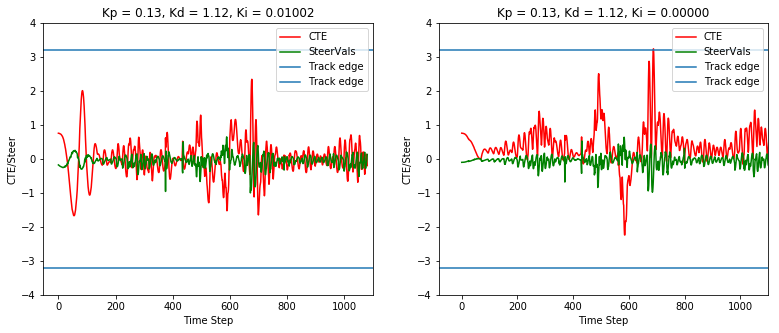

In [54]:
(label1,errors1,steers1) = extract_data('ldef.txt')
(label2,errors2,steers2) = extract_data('ldefi0.txt')
fig_size = (13,5)
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(errors1[:,0],'r',label = 'CTE')
ax1.plot(steers1,'g',label = 'SteerVals')
ax1.axhline(3.2, label = 'Track edge')
ax1.axhline(-3.2, label = 'Track edge')
ax1.set_xlim(xmax=1100)
ax1.set_ylim(-4,4)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('CTE/Steer')
ax1.legend()
ax1.set_title(label1)
ax2.plot(errors2[:,0],'r',label = 'CTE')
ax2.plot(steers2,'g',label = 'SteerVals')
ax2.axhline(3.2, label = 'Track edge')
ax2.axhline(-3.2, label = 'Track edge')
ax2.set_xlim(xmax=1100)
ax2.set_ylim(-4,4)
plt.xlabel('Time Step')
plt.ylabel('CTE/Steer')
ax2.legend()
ax2.set_title(label2)

## Twiddle Optimization
Coefficients were optmized using the twiddle algorithm. This was an iterative process, where I went through certain coarse iterations to roughly gauge the operating values of the the three coefficents, Kp, Ki and Kd. Finally I ran the twiddle algorithm fully to arrive at the final parameters (0.134668,0.0100153,1.12234).
* Unlike the video lectures, I started the algorithm at different initial values for the three parameters.
* I also used different initial setp sizes for the three parameters. 
 * These were based on estimates from the initial coarse iterations of twiddle
* I was also able to reset the simulator before stating with a new set of parameters during the twiddle algorithm
* Since the car frequently went off track and somestimes got stuck during the algorithm, I had an error condition that detected when the car went off track and assigned a high cost to this run. This cost was higher if the car went off track earlier.

The progression of the twiddle algorithm is visualized in terms of how the the three parameters evolved below.
The final result with (Kp, Ki, Kd) = (0.134668,0.0100153,1.12234) is also plotted at the end. Since the simulator did not allow me to record the video, I instead chose to plot the error as a means of visualization.

### Note:
It was seen that the algorithm (as well as the simulator laps) was sensitive to the computer that was used for the project. I got different results on a different desktop computer. This is likely due to the fact that the CTE as well as impact of our steering angles change based on simulator speed as well as the uWS interface. Hopefully this does not impact the project evaluation.

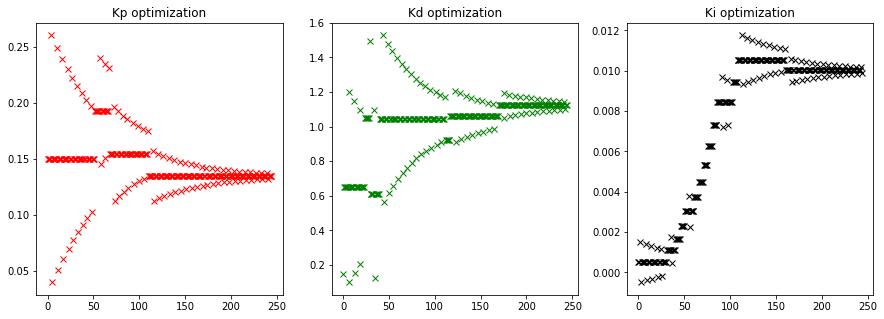

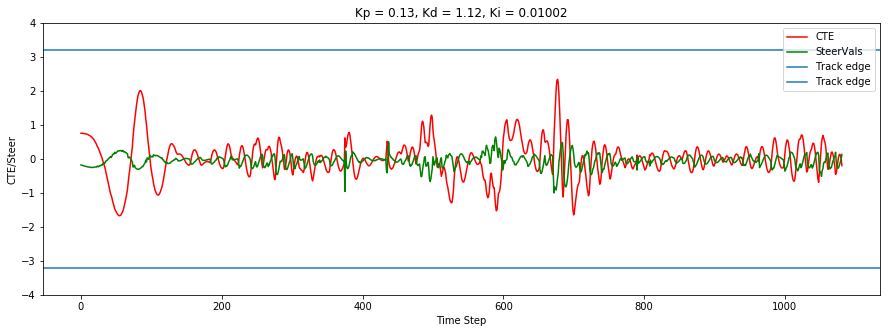

In [55]:
mydata = np.loadtxt('data1.txt')
fig_size = (15,5)
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
f, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(mydata[:,0],'rx')
ax1.set_title('Kp optimization')
ax2.plot(mydata[:,1],'gx')
ax2.set_title('Kd optimization')
ax3.plot(mydata[:,2],'kx')
ax3.set_title('Ki optimization')
plt.figure()
plt.plot(errors1[:,0],'r',label = 'CTE')
plt.plot(steers1,'g',label = 'SteerVals')
plt.axhline(3.2, label = 'Track edge')
plt.axhline(-3.2, label = 'Track edge')
plt.ylim(-4,4)
plt.xlabel('Time Step')
plt.ylabel('CTE/Steer')
plt.legend()
plt.title(label1)
